In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

/Users/vasilisstamatopoulos/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
om3 = [0.326, 0.447, 0.318, 0.481, 0.312, 0.304, 0.432, 0.461, 0.421, 0.423, 0.410, 0.447, 0.334, 0.487, 0.473, 0.368, 0.423, 0.493, 0.379, 0.424, 0.327, 0.475, 0.423, 0.445, 0.358, 0.387, 0.491, 0.396, 0.305, 0.352, 0.322, 0.381, 0.316, 0.488, 0.365, 0.371, 0.449, 0.337, 0.441, 0.349, 0.486, 0.370, 0.330, 0.488, 0.403, 0.426, 0.440, 0.356, 0.355, 0.467]

In [3]:

exps = [
    ["output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.01_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.05_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.5_a=0.95_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4m=2", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4m=4"],
    ["output_scalability_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4-memory"]
]

exp_names = [
    "InfluxDB",
    "PostgreSQL",
    "Memory",
    "Initial Query Selectivity",
    "No. of Variables",
    "Dataset Size",
    "Memory",
]

labels = [
    ["MinMaxCache", "M4"],
    ["MinMaxCache", "M4"],
    ["MinMaxCache", "RawCache"],
    ["1%", "5%", "10%", "50%"],
    ["1", "2", "4"],
    ["1M", "2M", "4M", "8M", "16M", "32M", "64M", "128M", "256M", "512M", "1B"],
    ["MinMaxCache", "RawCache"],
]

palette = sns.color_palette("colorblind", n_colors=10)

colors = {
    "MinMaxCache": palette[0],
    "M4" : palette[1],
    "OM3" : palette[2],
    "RawCache" : palette[3],
}

datasets = [
    ["manufacturing_exp", "intel_lab_exp", "soccer_exp"],
    ["manufacturing_exp", "intel_lab_exp", "soccer_exp"],
    ["manufacturing_exp"],
    ["manufacturing_exp"],
    ["manufacturing_exp"],
    ["synthetic1m", "synthetic2m", "synthetic4m", "synthetic8m", "synthetic16m", "synthetic32m", "synthetic64m", "synthetic128m", "synthetic256m", "synthetic512m", "synthetic1b"],
    ["manufacturing_exp"],
]

comps = [
    ["m4-0.1"],
    ["m4-0.1"],
    ["raw-0.1"],
    ["m4-0.01", "m4-0.05", "m4-0.1", "m4-0.5"],
    ["m4-0.1", "m4-0.1m=2", "m4-0.1m=4"],
    ["output_scalability_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4"],
    ["raw-0.1"],

]

comp_results = [
    ["m4Results"],
    ["m4Results"],
    ["rawResults"],
    ["m4Results"],
    ["m4Results"],
    ["m4Results"],
    ["rawResults"]
]

m4 = [
    ["m4-0.1"],
]

dbs = [
    "influx",
    "postgres",
    "influx",
    "influx",
    "influx",
    "influx",
    "influx"
]

time_exps = [
    0, 
    1,
]

scalability_exps = [
   3,
   4,
   5,
]

memory_exps = [
    6
]

figsize = (7,3)


In [4]:
dcts = [{
        'IO Count': 'mean',
        'Time (sec)': 'mean',
        'Query Time (sec)': 'mean',
        'Progressive Time (sec)': 'mean',
        'Memory': 'mean',
        'query #': 'mean',
        'width' : 'mean',
        'height' : 'mean',
        'timeRange': lambda col: col.mode() if col.nunique() == 1 else np.nan,
        'from': 'mean',
        'to': 'mean',
        'Results size': lambda col: col.mode() if col.nunique() == 1 else np.nan,
        'Error': lambda col: col.mode() if col.nunique() == 1 else np.nan,
        'dataset': lambda col: col.mode() if col.nunique() == 1 else np.nan,
        'operation': lambda col: col.mode() if col.nunique() == 1 else np.nan
    }, 
        {
        'Time (sec)': 'mean',
        'query #': 'mean',
        'width' : 'mean',
        'height' : 'mean',
        'from': 'mean',
        'to': 'mean',
        'timeRange': lambda col: col.mode() if col.nunique() == 1 else np.nan,
        'Results size': lambda col: col.mode() if col.nunique() == 1 else np.nan,
        'dataset': lambda col: col.mode() if col.nunique() == 1 else np.nan,
        'operation': lambda col: col.mode() if col.nunique() == 1 else np.nan
    },
    {
        'IO Count': 'mean',
        'Time (sec)': 'mean',
        'Memory': 'mean',
        'query #': 'mean',
        'width' : 'mean',
        'height' : 'mean',
        'from': 'mean',
        'to': 'mean',
        'timeRange': lambda col: col.mode() if col.nunique() == 1 else np.nan,
        'Results size': lambda col: col.mode() if col.nunique() == 1 else np.nan,
        'dataset': lambda col: col.mode() if col.nunique() == 1 else np.nan,
        'operation': lambda col: col.mode() if col.nunique() == 1 else np.nan
    }]

In [5]:
def get_experiment_dfs(exp_id):
    data = [f"{exp}/timeQueries/{dbs[exp_id]}/" for exp in exps[exp_id]]
    # names = os.listdir(os.path.join(data[0]))
    names = datasets[exp_id]
    if '.DS_Store' in names: names.remove('.DS_Store')
    runs = list(np.sort(os.listdir(os.path.join(data[0], names[0]))))
    if '.DS_Store' in runs: runs.remove('.DS_Store')
    results = ["ttiMinMaxResults"]
    results_paths = [os.path.join(d, name, run, result)  for name in names for d in data for result in results for run in runs  ]
    dfs_all = [pd.read_csv(os.path.join(df, "results.csv")) for df in results_paths]
    dfs = []
    for i in range(0, len(dfs_all), len(runs)):
        dds = dfs_all[i : i + len(runs)]
        d = dds[0]
        if(len(runs) > 1):
            for j in range(1, len(runs)):
                d = pd.concat((d, dds[j]))
            if("raw" in results_paths[i]):
                dct = dcts[2]
            elif("m4" in results_paths[i]):
                dct = dcts[1]
            else:
                dct = dcts[0]
            d = d.groupby(d.index).agg(**{k: (k, v) for k, v in dct.items()})
        dfs.append(d)
    return dfs, names


def get_competitor_dfs(exp_id):
    data = [f"{exp}/timeQueries/{dbs[exp_id]}/" for exp in comps[exp_id]]
    names = datasets[exp_id]
    if '.DS_Store' in names: names.remove('.DS_Store')
    runs = list(np.sort(os.listdir(os.path.join(data[0], names[0]))))
    if '.DS_Store' in runs: runs.remove('.DS_Store')
    results = comp_results[exp_id]
    results_paths = [os.path.join(d, name, run, result)  for name in names for d in data for result in results for run in runs]
    dfs_all = []
    for df in results_paths:
        if(os.path.exists(os.path.join(df, "results.csv"))):
            dfs_all.append(pd.read_csv(os.path.join(df, "results.csv")))
    dfs = []
    for i in range(0, len(dfs_all), len(runs)):
        dds = dfs_all[i : i + len(runs)]
        d = dds[0]
        if(len(runs) > 1):
            for j in range(1, len(runs)):
                d = pd.concat((d, dds[j]))
            if("raw" in results_paths[i]):
                dct = dcts[2]
            elif("m4" in results_paths[i]):
                dct = dcts[1]
            else:
                dct = dcts[0]
            d = d.groupby(d.index).agg(**{k: (k, v) for k, v in dct.items()})
        d = d.rename(columns={'Time (sec)': 'Query Time (sec)'})
        dfs.append(d)
    return dfs, names

def reorder_list(lst, n):
    result = []
    for i, val in enumerate(zip(*[iter(lst)] * n)):
        result.extend(val)
    return result

def reverse_elements_between_indexes(lst, start_index, end_index):
    if not 0 <= start_index < len(lst) or not 0 <= end_index < len(lst):
        raise ValueError("Invalid start or end index.")
    
    if start_index >= end_index:
        raise ValueError("Start index must be less than end index.")
    
    return lst[:start_index] + lst[start_index:end_index + 1][::-1] + lst[end_index + 1:]


def get_dfs(exp_id):
    dfs, names = get_experiment_dfs(exp_id)
    dfs_comps, _ = get_competitor_dfs(exp_id)
    dfs.extend(dfs_comps)
    dfs = sorted(dfs, key=lambda x: x['dataset'].iloc[0])
    return dfs, names

In [6]:

def reorder_list(lst):
    last_item = lst[-1]  # Get the last item
    lst.pop()  # Remove the last item
    lst.insert(1, last_item)  # Insert the last item at the second position
    return lst

def plot_time(dfs, exp_id, OM3_data, RawCache_data):
    name = dfs[0]['dataset'][0]
    lbls = []
    for l in labels[exp_id]:
        lbls.append(l)
    exp_name = exp_names[exp_id]

    plt.clf()
    sns.set(style="whitegrid")

    # Set a palette with more vibrant colors
    palette = []
    for lbl in lbls:
        palette.append(colors[lbl])
    sns.set_palette(palette)

    fig, axs = plt.subplots(1, 2, figsize=figsize, gridspec_kw={'width_ratios': [3, 1]}, constrained_layout=True)
    om3_init_time = 0
    times = []
    for i in range(len(lbls)):
        time = dfs[i]["Query Time (sec)"]
        times.append(time)
        sns.lineplot(data=time, ax=axs[0], label=lbls[i], linewidth=1, linestyle='-', alpha=0.8)

    if len(OM3_data) == 0:
        pass
        # OM3_data is empty, add placeholders
        #times.append(-1)
        #lbls.append("OM3 (Unavailable)")
        #palette.append("gray")  # You can use any color to represent the "X" bar
    else:
        # Add OM3 data to the plot
        sns.lineplot(data=OM3_data, ax=axs[0], color=colors['OM3'], label="OM3", linewidth=1, linestyle='-', alpha=0.8)
        times.append(np.array(OM3_data))
        lbls.append("OM3")
        palette.append(colors["OM3"])
        om3_init_time = 169
        
    if len(RawCache_data) == 0:
        pass
        # RawCache_data is empty, add placeholders
        #times.append(-1)
        #lbls.append("RawCache (Unavailable)")
        #palette.append("gray")  # You can use any color to represent the "X" bar
    else:
        # Add RawCache data to the plot
        sns.lineplot(data=RawCache_data, ax=axs[0], color=colors['RawCache'], label="RawCache", linewidth=1, linestyle='-', alpha=0.8)
        times.append(np.array(RawCache_data))
        lbls.append("RawCache")
        palette.append(colors["RawCache"])
        
    axs[0].get_legend().remove()
    
    mean_matrix = []
    sum_matrix = []
    x_positions = []
    length = len(lbls)
    width = 0.25
    for i in range(length):
        row2 = []
        x_positions.append(i * (1 / length))
        if isinstance(times[i], int): 
            for j in range(length):
                row2.append(0)   
        else:
            for j in range(length):
                if i == j:
                    row2.append(times[i].sum())
                else:
                    row2.append(0)
        sum_matrix.append(row2)
    for i in range(length):
        if i == length - 2 and len(OM3_data) > 0:
            #Stacked bar for OM3 initialization time
            lbls.append("OM3 Init. Time")
            lbls = reverse_elements_between_indexes(lbls, 3, 4)
            lbls = reverse_elements_between_indexes(lbls, 2, 3)
            axs[1].bar(x_positions[i], om3_init_time, color=colors['OM3'], alpha=0.4, width = width, label="OM3 Init. Time", hatch="//")
            axs[1].bar(x_positions[i], sum_matrix[i][i], bottom=om3_init_time, width=width, color=colors['OM3'], label="OM3")
        else:
            axs[1].bar(x_positions[i], sum_matrix[i], color=palette[i], width = width, label=lbls[i])
    
    axs[1].set_xticklabels([])
    axs[1].set_ylabel('Total Evaluation Time (sec)', fontsize=12)

    # Create a custom legend with boxes representing the patterns
    handles, _ = axs[1].get_legend_handles_labels()
    #custom_legend = plt.legend(handles, lbls, bbox_to_anchor=(0, 2.6), ncols=5, frameon=False)
    #custom_legend = plt.legend(handles, lbls, bbox_to_anchor=(1, 0.6), frameon=False)
    #plt.setp(custom_legend.get_title(), fontweight='bold')  # Set legend title font weight

    for ax in axs:
        ax.spines['top'].set_visible(False)  # Remove top border
        ax.spines['right'].set_visible(False)  # Remove right border

    # Set axis labels and font size
    axs[0].set_xlabel('Query', fontsize=12)
    axs[0].set_ylabel('Time (sec)', fontsize=12)

    # Adjust spacing and margins
    fig.subplots_adjust(bottom=0.2, wspace=0.3)  # Adjust the bottom margin and horizontal spacing
    plt.tight_layout()  # Adjust spacing and margins automatically

    # Save the plot as a PDF or other image format for high-quality output in the scientific paper
    plt.savefig(f'times/{exp_name}_{name}.png'.replace("%", ""),bbox_inches='tight', pad_inches=0,dpi=300)  # Adjust the filename and DPI as needed

    plt.show()
    

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/615554517.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[t < 0.04] = 0
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/1207808221.py:107: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)  # Adjust the bottom margin and horizontal spacing
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/1207808221.py:108: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust spacing and margins automatically


<Figure size 640x480 with 0 Axes>

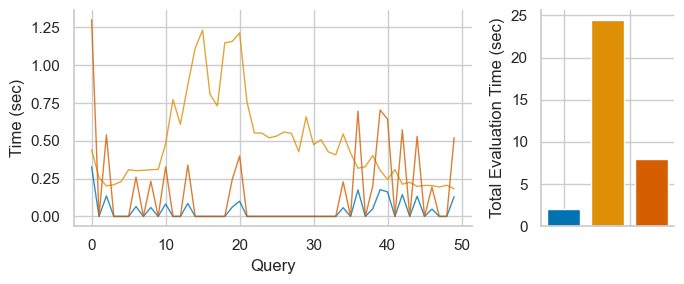

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/615554517.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[t < 0.04] = 0
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/1207808221.py:107: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)  # Adjust the bottom margin and horizontal spacing
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/1207808221.py:108: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust spacing and margins automatically


<Figure size 640x480 with 0 Axes>

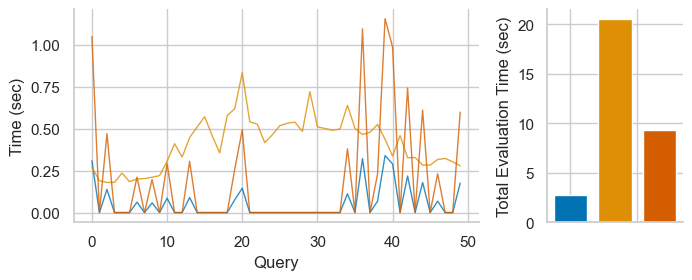

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/1207808221.py:107: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)  # Adjust the bottom margin and horizontal spacing
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/1207808221.py:108: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust spacing and margins automatically


<Figure size 640x480 with 0 Axes>

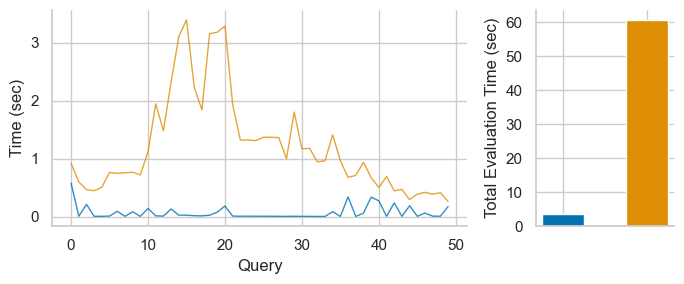

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/615554517.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[t < 0.04] = 0
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/1207808221.py:107: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)  # Adjust the bottom margin and horizontal spacing
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/1207808221.py:108: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust spacing and margins automatically


<Figure size 640x480 with 0 Axes>

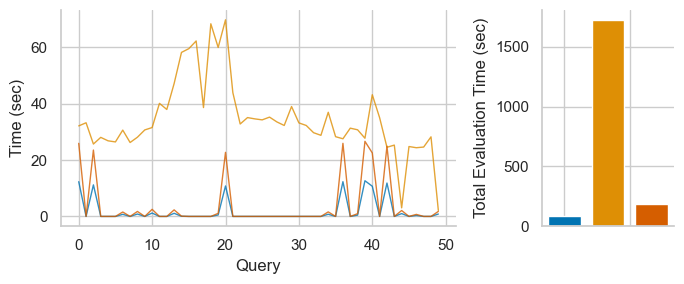

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/615554517.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[t < 0.04] = 0
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/1207808221.py:107: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)  # Adjust the bottom margin and horizontal spacing
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/1207808221.py:108: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust spacing and margins automatically


<Figure size 640x480 with 0 Axes>

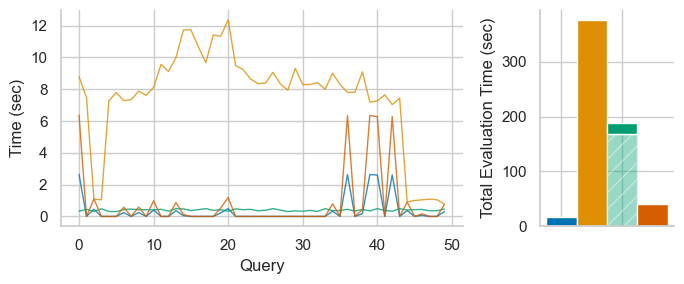

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/1207808221.py:107: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)  # Adjust the bottom margin and horizontal spacing
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/1207808221.py:108: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust spacing and margins automatically


<Figure size 640x480 with 0 Axes>

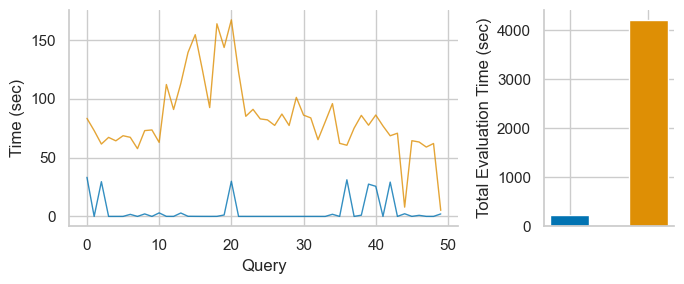

In [7]:
for exp_id in time_exps:
    j = 0
    dfs, names = get_dfs(exp_id)
    for i in range(0, len(dfs), len(labels[exp_id])):
        df = dfs[i : i + len(labels[exp_id])][0]
        t = df['Query Time (sec)']
        t_raw = []
        if(df['dataset'][0] == 'manufacturing_exp' or df['dataset'][0] == 'intel_lab_exp'):
            t[t < 0.04] = 0
            random_float = random.uniform(2, 4)
            t_raw = t * random_float
        t_om3 = []
        if(df['dataset'][0] == 'manufacturing_exp' and dbs[exp_id] == 'postgres'):
            t_om3 = om3
        plot_time(dfs[i : i + len(labels[exp_id])], exp_id, t_om3, t_raw)
        j +=1

# SCALABILITY

In [39]:
def plot_single_time(df_list, n=11, exp_id=5):
    lbls = labels[exp_id]
    exp_name = exp_names[exp_id]
    legend = ["MinMaxCache", "M4", "RawCache"]
    figsize = (5,3)

    for i in range(n):
        df_raw = df_list[i].copy()
        t = df_list[i]['Query Time (sec)']
        t[t < 0.04] = 0
        random_float = random.uniform(5, 7)
        df_raw['Query Time (sec)'] = t * random_float
        df_list.append(df_raw)

    plt.clf()
    sns.set(style="whitegrid")

    # Set a palette with more vibrant colors
    palette = []
    for l in legend:
        palette.append(colors[l])
    sns.set_palette(palette)

    fig, axs = plt.subplots(1, 1, figsize=figsize, constrained_layout=True)

    for set_num, dfs_list in enumerate([df_list[:n], df_list[n:2*n], df_list[2*n:3*n]]):
        times = []
        for i in range(len(lbls)):
            time = dfs_list[i]["Query Time (sec)"]
            times.append(time)

        sum_times = [time.sum() for time in times]
        x = np.array([1000000 * 2**i for i in range(11)])
        sum_times = np.array(sum_times)
        if(set_num == 2): 
            x = x[:7]
            sum_times = sum_times[:7]
    
        # Show only specific x-axis ticks
        x_axis_ticks = [10000000, 252000000, 512000000, 1000000000]
        x_axis_labels = ['10M', '252M', '512M', '1B']

        sns.lineplot(x=x, y=sum_times, marker='o', markersize=8, ax=axs, color=palette[set_num], label=legend[set_num])

        axs.set_xticks(x_axis_ticks)
        axs.set_xticklabels(x_axis_labels)

        axs.spines['top'].set_visible(False)
        axs.spines['right'].set_visible(False)

        axs.set_ylabel('Total Evaluation Time (sec)', fontsize=12)
        axs.set_xlabel('Number of Data Points', fontsize=12)

    axs.legend()
    plt.tight_layout()
    plt.savefig(f'times/{exp_name}_comparison.png'.replace("%", ""), pad_inches=0, dpi=300)
    plt.show()

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/928230169.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[t < 0.04] = 0


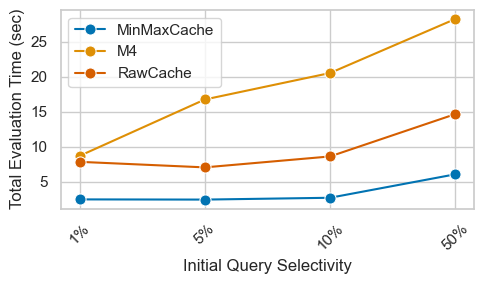

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/928230169.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[t < 0.04] = 0


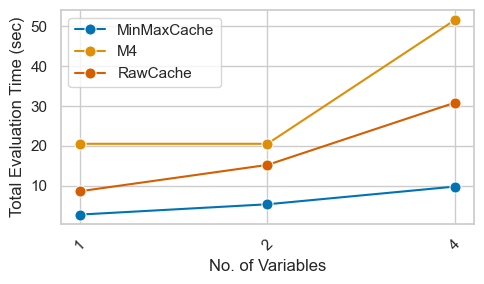

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/1407781971.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t[t < 0.04] = 0
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_10354/1407781971.py:55: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

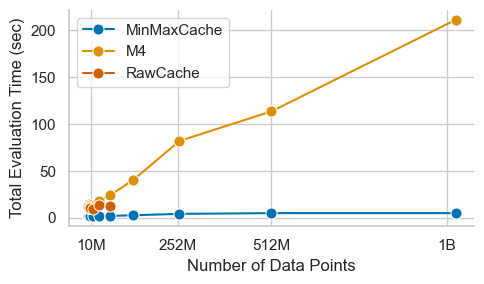

In [40]:
def plot_scalability(df_list, raw=True):
    
    random.seed(10)
    figsize = (5,3)
    legend = ["MinMaxCache", "M4", "RawCache"]
    exp_name = exp_names[exp_id]
    name = df_list[0]['dataset'][0]
    plt.figure(figsize=figsize)
    lbls = labels[exp_id]  # Replace with your labels

    n = len(lbls)
    if(raw):
        for i in range(n):
            df_raw = df_list[i].copy()
            t = df_list[i]['Query Time (sec)']
            t[t < 0.04] = 0
            random_float = random.uniform(2, 4)
            df_raw['Query Time (sec)'] = t * random_float
            df_list.append(df_raw)
    # Number of sets of experiments (n)
    # Column name for summing
    column_to_sum = "Query Time (sec)"  # Replace with your column name
    
    # Set a palette with more vibrant colors
    palette = []
    for l in legend:
        palette.append(colors[l])
    sns.set_palette(palette)
    
    # List of labels for the bottom x-axis

    #Function to sum the specified column from each dataframe in the list
    def sum_column_from_dfs(df_list, column_name):
        return [df[column_name].sum() for df in df_list]

    # Split the list of dataframes into multiple chunks, each containing 'n' dataframes
    dfs_chunks = [df_list[i:i + n] for i in range(0, len(df_list), n)]

    # Create a line plot for each chunk of dataframes
    
    for i, dfs_chunk in enumerate(dfs_chunks):
        sums = sum_column_from_dfs(dfs_chunk, column_to_sum)
        sns.lineplot(x=lbls[:n], y=sums, marker="o", markersize=8, label=legend[i])

    plt.xlabel(exp_names[exp_id])
    plt.ylabel("Total Evaluation Time (sec)")
    #plt.title(f"Sum of Query Time for {len(dfs_chunks)} sets of experiments")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'times/{exp_name}_{dbs[exp_id]}_{name}.png'.replace("%", ""), pad_inches=0, dpi=300)  # Adjust the filename and DPI as needed
    plt.show()

def convert_value(value):
    multipliers = {'m': 1e6, 'b': 1e9}  # Define the multipliers for 'm' and 'b'
    suffix = value[-1]  # Get the last character from the value (e.g., 'm', 'b')
    number = float(value.split('synthetic')[1][:-1])  # Get the numeric part of the value
    return number * multipliers.get(suffix, 1)  # Multiply the number by the corresponding multiplier

def sort_key(df):
    has_progressive_time_column = 'Progressive Time (sec)' in df.columns
    return (not has_progressive_time_column, convert_value(df['dataset'][0]))


for exp_id in scalability_exps:
    j = 0
    
    df_list, names = get_dfs(exp_id)
    raw = True
    if(exp_id) == 5: 
        sorted_dataframes = sorted(df_list, key=sort_key)
        #sorted_dataframes = sorted(df_list, key=lambda df: convert_value(df['dataset'][0]))
        plot_single_time(sorted_dataframes)
        raw = False
    else:
        plot_scalability(df_list, raw)

# MEMORY

In [263]:
def plot_memory(df_list, raw=True):
    
    random.seed(10)
    figsize = (5,3)
    legend = ["MinMaxCache", "RawCache"]
    exp_name = exp_names[exp_id]
    name = df_list[0]['dataset'][0]
    plt.figure(figsize=figsize)
    lbls = labels[exp_id]  # Replace with your labels

    n = len(lbls)
    
    # Set a palette with more vibrant colors
    palette = []
    for l in legend:
        palette.append(colors[l])
    sns.set_palette(palette)
    
    # List of labels for the bottom x-axis

    # Split the list of dataframes into multiple chunks, each containing 'n' dataframes
    dfs_chunks = [df_list[0], df_list[1]]

    # Create a line plot for each chunk of dataframes
    
    for i, dfs_chunk in enumerate(dfs_chunks):
        mem = dfs_chunk['Memory']
        sns.lineplot(x=np.arange(50), y=mem, markersize=8, label=legend[i])

    plt.xlabel("Query")
    plt.ylabel("Memory (bytes) (Log. Scale)")
    plt.yscale('log')
    #plt.title(f"Sum of Query Time for {len(dfs_chunks)} sets of experiments")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'memory/{exp_name}_{dbs[exp_id]}_{name}.png'.replace("%", ""), pad_inches=0, dpi=300)  # Adjust the filename and DPI as needed
    plt.show()

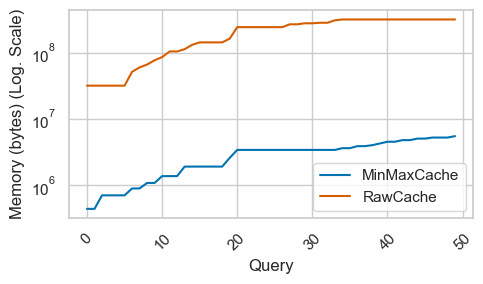

In [236]:

for exp_id in memory_exps:
    j = 0
    df_list, names = get_dfs(exp_id)
    raw = True
    plot_memory(df_list, raw)